In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [2]:
data = './winequalityN.csv'
df = pd.read_csv(data, header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,white,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
2,white,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
3,white,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
4,white,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6493,red,6.2,0.6,0.08,2,0.09,32,44,0.9949,3.45,0.58,10.5,5
6494,red,5.9,0.55,0.1,2.2,0.062,39,51,0.99512,3.52,NaN,11.2,6
6495,red,6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11,6
6496,red,5.9,0.645,0.12,2,0.075,32,44,0.99547,3.57,0.71,10.2,5


In [3]:
df.columns = df.iloc[0]
df = df.drop(0)
label = LabelEncoder()
categorical_columns = ['type']
for column in categorical_columns:
    df[column] = label.fit_transform(df[column])

In [4]:
print(round(df.describe(),2))

0         type
count  6497.00
mean      0.75
std       0.43
min       0.00
25%       1.00
50%       1.00
75%       1.00
max       1.00


## KNN

### Visualizando a correlação das variáveis com a variável de classe

In [ ]:
correlation = df.corr()
correlation['type'].sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Correlation of atributes')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [ ]:
X = df.drop(['type'], axis=1)
y = df['type']

### Separa base de teste e de treino

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
cols = X_train.columns

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])


In [ ]:

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


In [ ]:
y_pred = knn.predict(X_test)
y_pred

In [ ]:
knn.predict_proba(X_test)[:,0]

In [ ]:
knn.predict_proba(X_test)[:,1]

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
y_pred_train = knn.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


In [ ]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

In [ ]:
y_test.value_counts()


In [ ]:
null_accuracy = (958/(958+958))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)
y_pred_5 = knn_5.predict(X_test)

print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))


In [ ]:
# instantiate the model with k=6
knn_6 = KNeighborsClassifier(n_neighbors=6)


# fit the model to the training set
knn_6.fit(X_train, y_train)


# predict on the test-set
y_pred_6 = knn_6.predict(X_test)


print('Model accuracy score with k=6 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_6)))


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_5)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


In [ ]:
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, columns=['Predição:1', 'Resultado:0'], 
                                 index=['Predição:1', 'Resultado:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_5))


In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)

false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))
Specificity : 0.9643


## Árvores de decisão

In [5]:
X = df.drop(['type'], axis=1)
y = df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
cols = X_train.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [7]:
y_pred_en = clf_en.predict(X_test)


In [8]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9723


In [9]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9786
Test set score: 0.9723


[Text(0.5, 0.875, 'x[4] <= 0.128\nentropy = 0.803\nsamples = 5197\nvalue = [1274.0, 3923.0]'),
 Text(0.25, 0.625, 'x[6] <= -1.09\nentropy = 0.219\nsamples = 3775\nvalue = [132, 3643]'),
 Text(0.125, 0.375, 'x[4] <= -0.493\nentropy = 0.898\nsamples = 137\nvalue = [94, 43]'),
 Text(0.0625, 0.125, 'entropy = 0.316\nsamples = 35\nvalue = [2, 33]'),
 Text(0.1875, 0.125, 'entropy = 0.463\nsamples = 102\nvalue = [92, 10]'),
 Text(0.375, 0.375, 'x[1] <= 0.76\nentropy = 0.084\nsamples = 3638\nvalue = [38, 3600]'),
 Text(0.3125, 0.125, 'entropy = 0.051\nsamples = 3475\nvalue = [20, 3455]'),
 Text(0.4375, 0.125, 'entropy = 0.501\nsamples = 163\nvalue = [18, 145]'),
 Text(0.75, 0.625, 'x[6] <= -0.447\nentropy = 0.716\nsamples = 1422\nvalue = [1142, 280]'),
 Text(0.625, 0.375, 'x[7] <= -0.664\nentropy = 0.079\nsamples = 1031\nvalue = [1021, 10]'),
 Text(0.5625, 0.125, 'entropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.6875, 0.125, 'entropy = 0.011\nsamples = 1017\nvalue = [1016, 1]'),
 Text(0

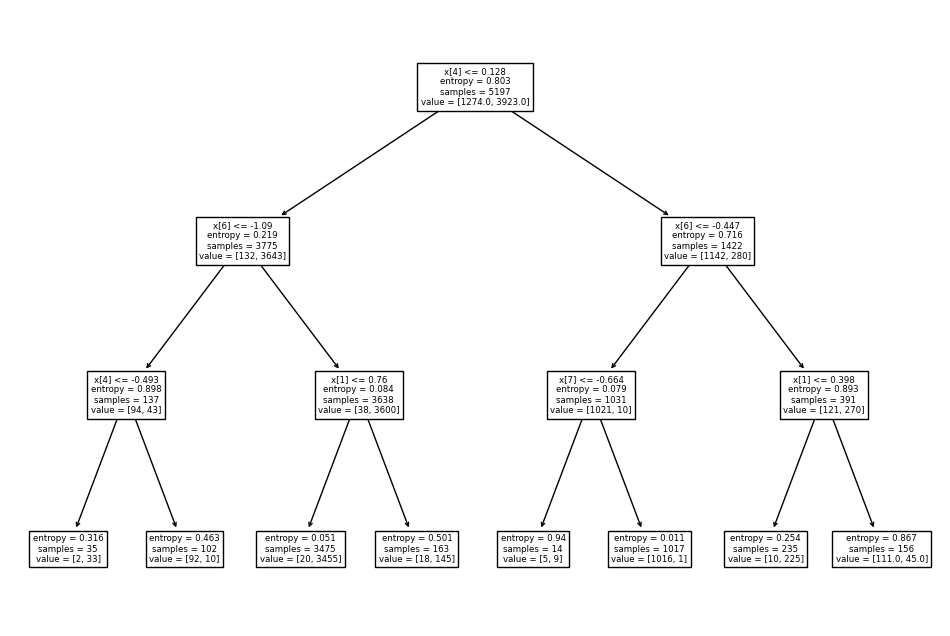

In [10]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [12]:

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


Confusion matrix

 [[307  18]
 [ 18 957]]

True Positives(TP) =  307

True Negatives(TN) =  957

False Positives(FP) =  18

False Negatives(FN) =  18


In [14]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)

false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))


Classification accuracy : 0.9723
Classification error : 0.0277
Precision : 0.9446
Recall or Sensitivity : 0.9446
False Positive Rate : 0.0185
Specificity : 0.9815


<Axes: >

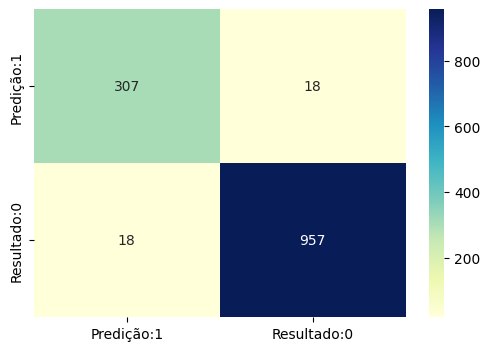

In [15]:
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, columns=['Predição:1', 'Resultado:0'], 
                                 index=['Predição:1', 'Resultado:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Random Forest

In [12]:
X = df.drop(['type'], axis=1)
y = df['type']
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
cols = X_train.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with 10 decision-trees : 0.9962


In [14]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))


Model accuracy score with 100 decision-trees : 0.9962


In [15]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [16]:
feature_scores = pd.Series(clf.feature_importances_, index=cols).sort_values(ascending=False)

feature_scores

0
total sulfur dioxide    0.273110
chlorides               0.265417
volatile acidity        0.134198
density                 0.067250
free sulfur dioxide     0.054673
sulphates               0.054482
residual sugar          0.050545
fixed acidity           0.048153
pH                      0.022293
citric acid             0.016580
alcohol                 0.010571
quality                 0.002728
dtype: float64

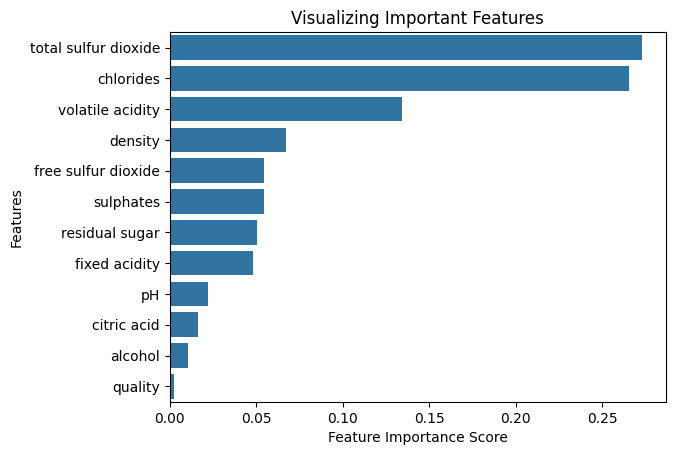

In [17]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

In [20]:
X = df.drop(['type', 'quality', 'alcohol', 'citric acid', 'pH'], axis=1)

y = df['type']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
cols = X_train.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with doors variable removed : 0.9954


In [27]:

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


Confusion matrix

 [[322   3]
 [  3 972]]

True Positives(TP) =  322

True Negatives(TN) =  972

False Positives(FP) =  3

False Negatives(FN) =  3


In [29]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)

false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))


Classification accuracy : 0.9954
Classification error : 0.0046
Precision : 0.9908
Recall or Sensitivity : 0.9908
False Positive Rate : 0.0031
Specificity : 0.9969


<Axes: >

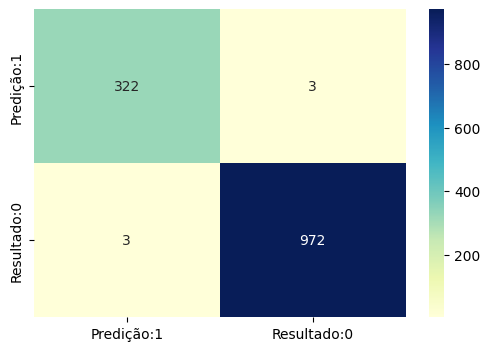

In [30]:
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, columns=['Predição:1', 'Resultado:0'], 
                                 index=['Predição:1', 'Resultado:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')